In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer  # Añade esta línea
import matplotlib.pyplot as plt
import joblib



In [14]:
propinas = sns.load_dataset('tips')
print("Estadisticas basicas del conjunto de datos:")
print(propinas.describe())

Estadisticas basicas del conjunto de datos:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [15]:
propinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [16]:
# limpieza de  datos nulos o vacios
propinas_limpias = propinas.dropna().drop_duplicates()

In [17]:
propinas_limpias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  243 non-null    float64 
 1   tip         243 non-null    float64 
 2   sex         243 non-null    category
 3   smoker      243 non-null    category
 4   day         243 non-null    category
 5   time        243 non-null    category
 6   size        243 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 9.1 KB


<function matplotlib.pyplot.show(close=None, block=None)>

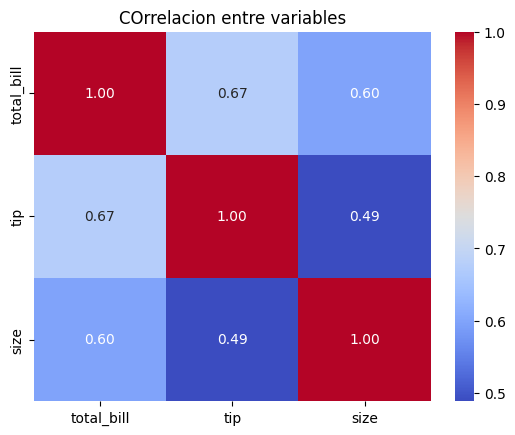

In [21]:
# Visualizacion de los datos
# cuardar en una variable datos las colummnas numericas

datos = propinas_limpias[["total_bill", "tip","size"]]
sns.heatmap(datos.corr(), annot = True, cmap ='coolwarm', fmt = '.2f')
plt.title("COrrelacion entre variables")
plt.show

In [31]:


X = propinas_limpias.drop(['tip','time'], axis = 1)
y = propinas_limpias["tip"]
modelo = Pipeline([
    ('preprocesamiento', ColumnTransformer(
        [
            ('scaler', StandardScaler(),['total_bill', 'size']),
            ('onehot', OneHotEncoder(), ['day', 'smoker','sex'])
        ], remainder = 'passthrough'   )), 
    ('regresor', RandomForestRegressor())])
    

scores = cross_val_score(modelo, X, y, cv =5, scoring = 'neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print("\nResultados de la validacion cruzada")
print("RMSE medio: ", rmse_scores.mean())
print("Desviacion estadar: ", rmse_scores.std())
modelo.fit(X,y)
fichero = 'modelo_random_forest.plk'
joblib.dump(modelo, fichero)

print("\nModelo entrenado y guardado en el fichero 'propinas_regresion_random_forest.pkl'", fichero)




Resultados de la validacion cruzada
RMSE medio:  1.0772027141688976
Desviacion estadar:  0.21800380127689095

Modelo entrenado y guardado en el fichero 'propinas_regresion_random_forest.pkl' modelo_random_forest.plk


In [35]:
modelo_cargado = joblib.load(fichero)
X_nuevos = X.head(5)
predicciones = modelo_cargado.predict(X_nuevos)
print("prediccion para los 5 primerios regustros: ", predicciones)



prediccion para los 5 primerios regustros:  [1.8824 1.7681 3.4685 3.2609 3.2441]


In [36]:
propinas_limpias.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
